# [Data Set](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

| **Column**            | **Description**                                                                                                 |
|:---------------------:|:----------------------------------------------------------------------------------------------------------------|
| **RowNumber**         | Corresponds to the record (row) number and has no effect on the output.                                         |
| **CustomerId**        | Contains random values and has no effect on customer leaving the bank.                                          |
| **Surname**           | The surname of a customer has no impact on their decision to leave the bank.                                    |
| **CreditScore**       | Can affect customer churn, as a higher credit score makes a customer less likely to leave the bank.             |
| **Geography**         | A customer’s location can affect their decision to leave the bank.                                              |
| **Gender**            | It's interesting to explore whether gender plays a role in a customer leaving the bank.                         |
| **Age**               | Older customers are generally less likely to leave their bank than younger ones.                                |
| **Tenure**            | Refers to the number of years the customer has been a client of the bank; older clients tend to be more loyal.  |
| **Balance**           | People with higher account balances are less likely to leave the bank compared to those with lower balances.    |
| **NumOfProducts**     | Refers to the number of products a customer has purchased through the bank.                                     |
| **HasCrCard**         | Denotes whether or not a customer has a credit card. People with credit cards are less likely to leave the bank.|
| **IsActiveMember**    | Active customers are less likely to leave the bank.                                                             |
| **EstimatedSalary**   | As with balance, people with lower salaries are more likely to leave the bank than those with higher salaries.  |
| **Exited**            | Indicates whether or not the customer left the bank.                                                            |
| **Complain**          | Whether the customer has filed a complaint or not.                                                              |
| **Satisfaction Score**| Score provided by the customer for their complaint resolution.                                                  |
| **Card Type**         | The type of card held by the customer.                                                                          |
| **Points Earned**     | The points earned by the customer for using their credit card.                                                  |


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from src.plot_function import *

custom_palette = {
    'Left': '#c53b53',
    'Non-Left': '#394b70'
}
sns.color_palette(list(custom_palette.values()))

[(0.7725490196078432, 0.23137254901960785, 0.3254901960784314),
 (0.2235294117647059, 0.29411764705882354, 0.4392156862745098)]

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [4]:
import catboost as cb
import lightgbm as lgb
import xgboost as xgb

In [5]:
df = pd.read_csv('data/Customer-Churn-Records.csv')
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
df['Exited_label'] = df['Exited'].map({0: 'Non-Left', 1: 'Left'})

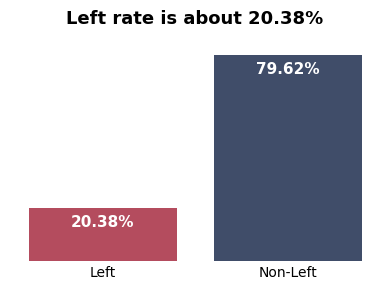

In [11]:
hue='Exited_label'
visualizer = DataVisualizer(df)
visualizer.plot_seaborn_bar(custom_palette=custom_palette, hue=hue)

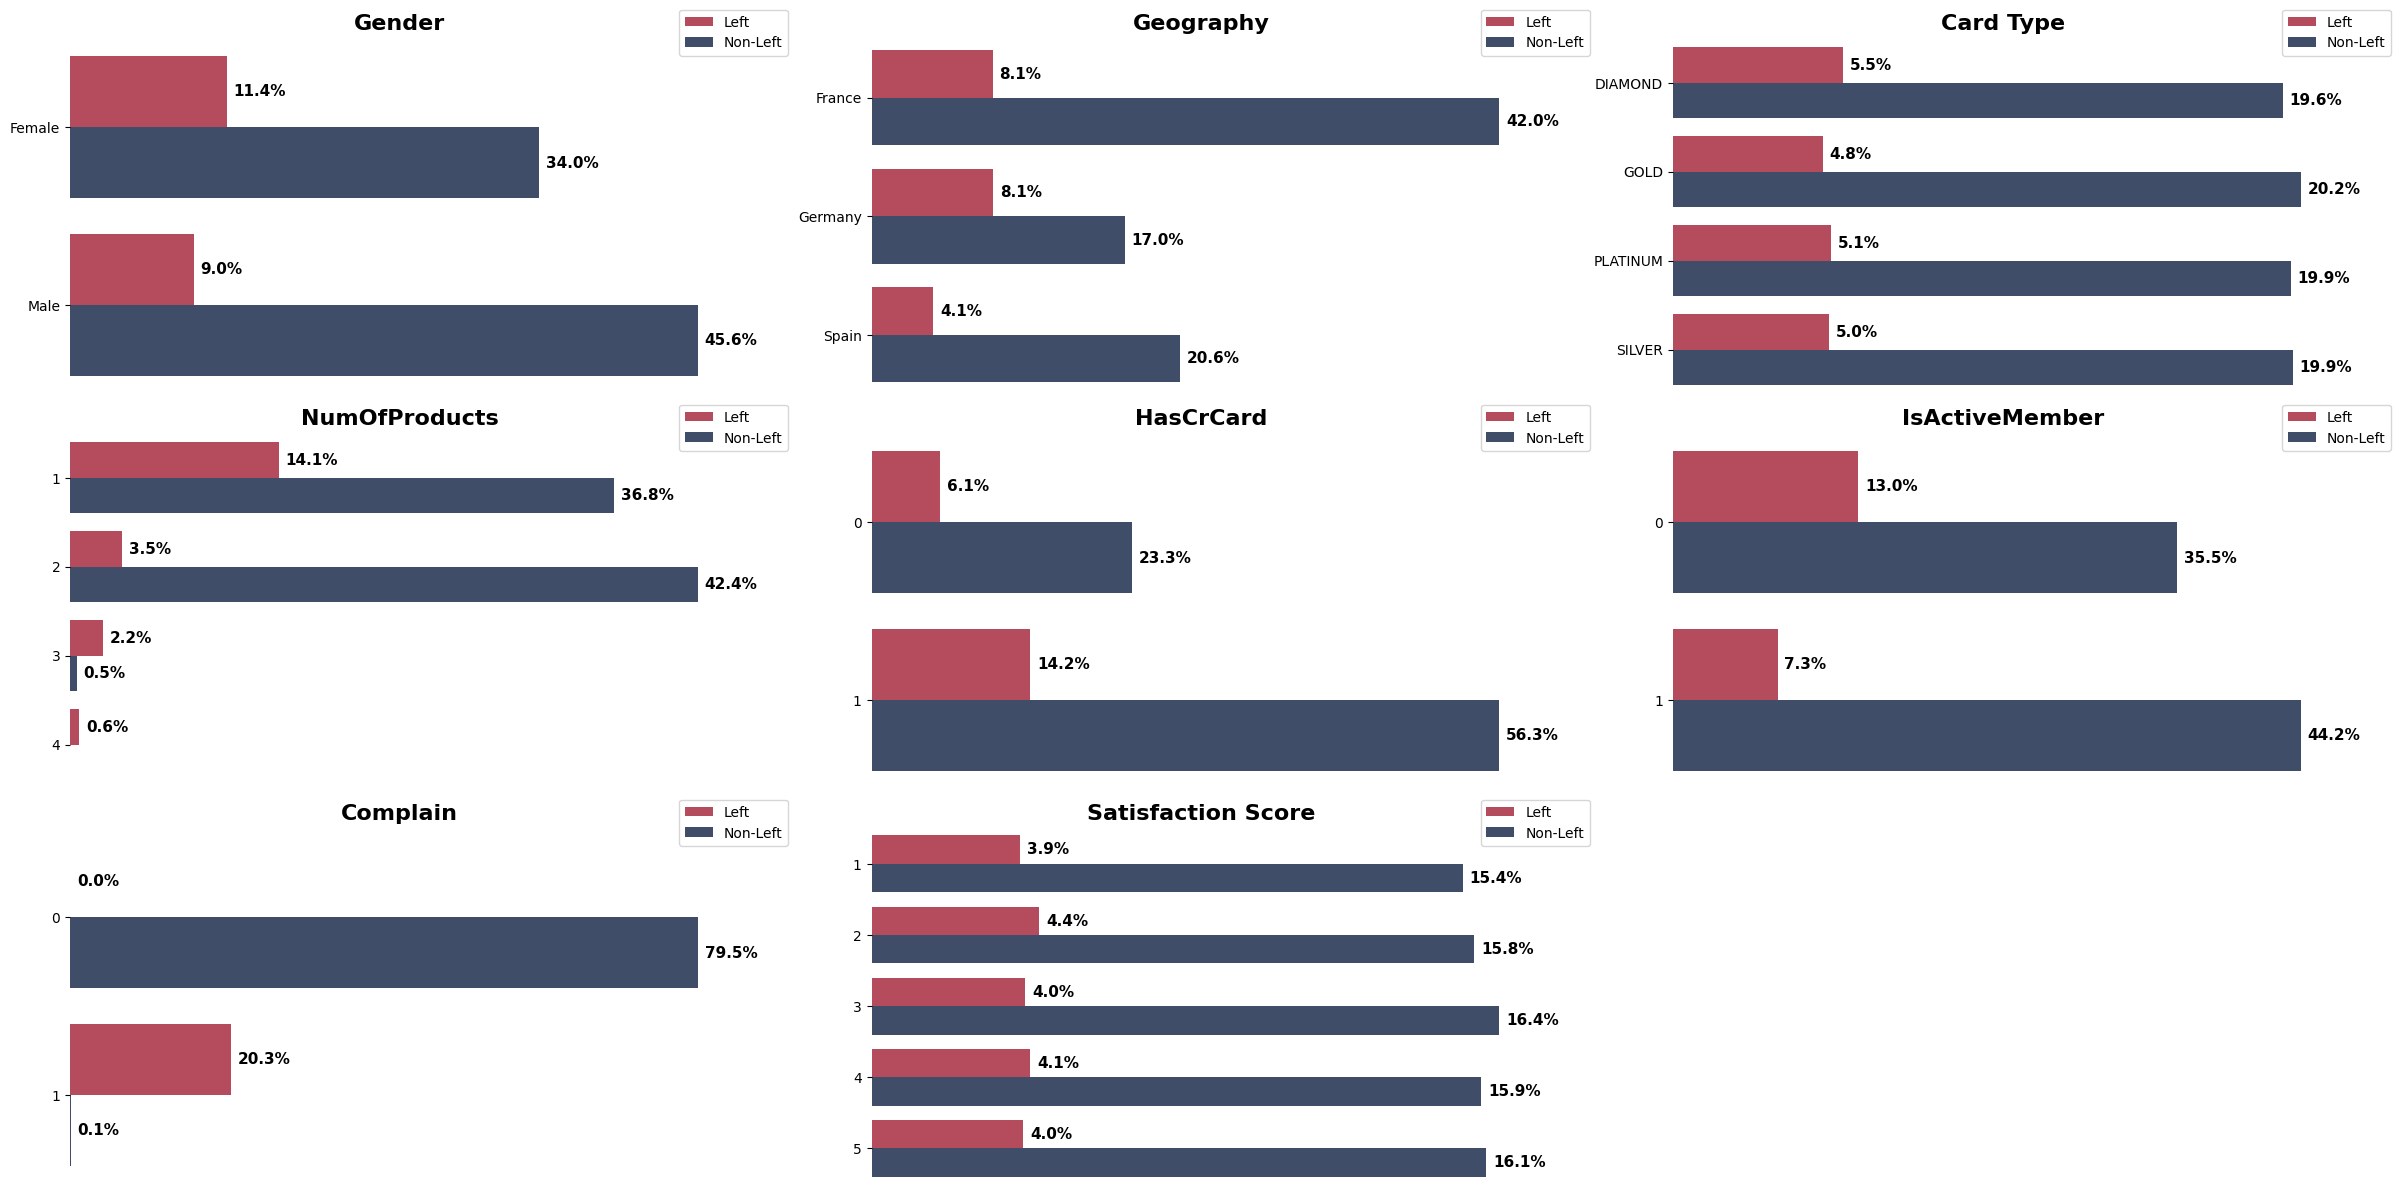

In [12]:
barplot_features = ['Gender', 'Geography', 'Card Type', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score']

hue = 'Exited_label'

visualizer = DataVisualizer(df)
visualizer.plot_barplot(barplot_features, hue=hue, custom_palette=custom_palette)

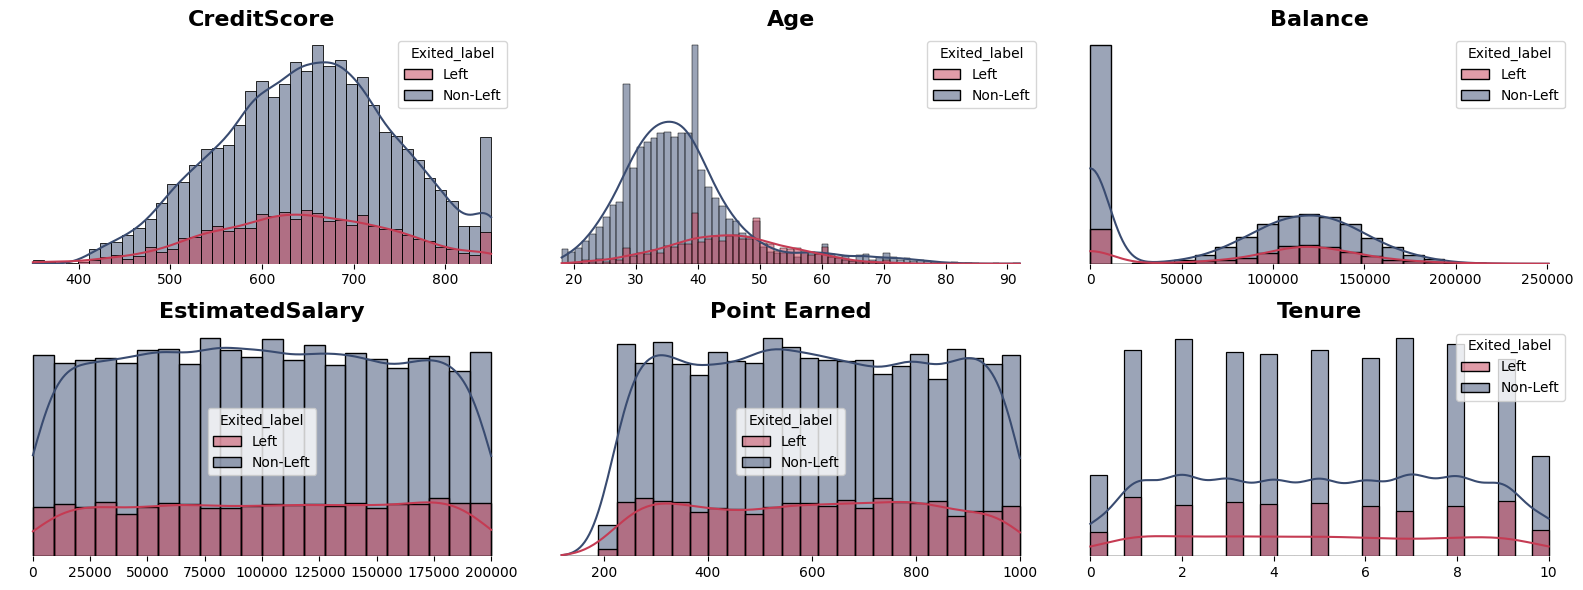

In [13]:
histogram_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned', 'Tenure']

hue_choice='Exited_label'
visualizer = DataVisualizer(df, figsize=(16, 6))
visualizer.plot_histplot(features=histogram_features, custom_palette=custom_palette, hue=hue_choice, kde=True)

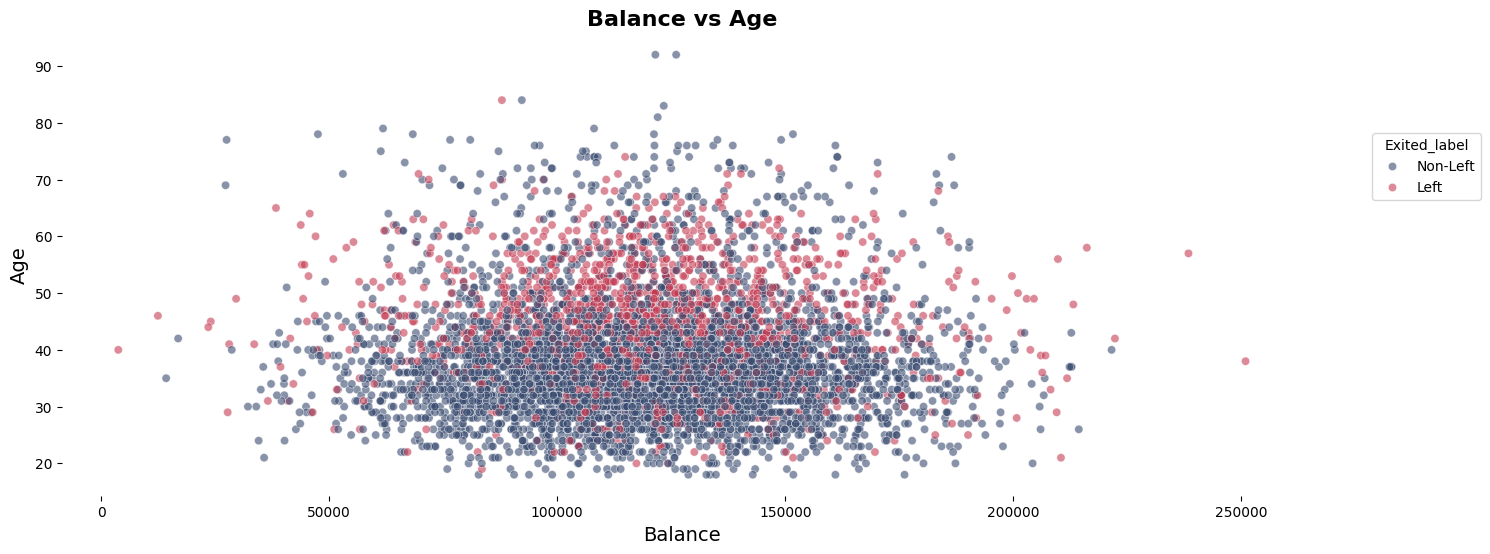

In [14]:
y = 'Age'
x = 'Balance'
hue = 'Exited_label'
df_filtered = df.loc[~(df[['Balance']] == 0).any(axis=1)]
visualizer = DataVisualizer(df_filtered)
visualizer.plot_custom_scatterplot(x=x, y=y, hue=hue, custom_palette=custom_palette)

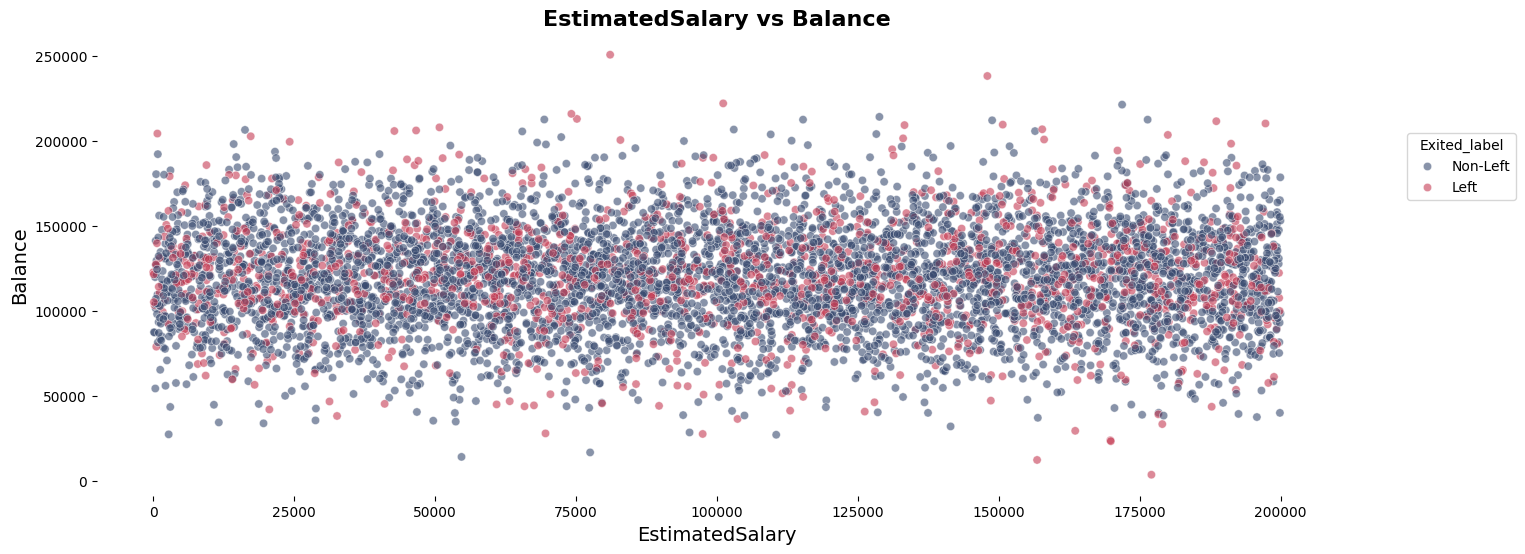

In [15]:
x = 'EstimatedSalary'
y = 'Balance'
hue = 'Exited_label'
# df_filtered = df.loc[~(df[['Balance']] == 0).any(axis=1)]
visualizer = DataVisualizer(df_filtered)
visualizer.plot_custom_scatterplot(x=x, y=y, hue=hue, custom_palette=custom_palette)

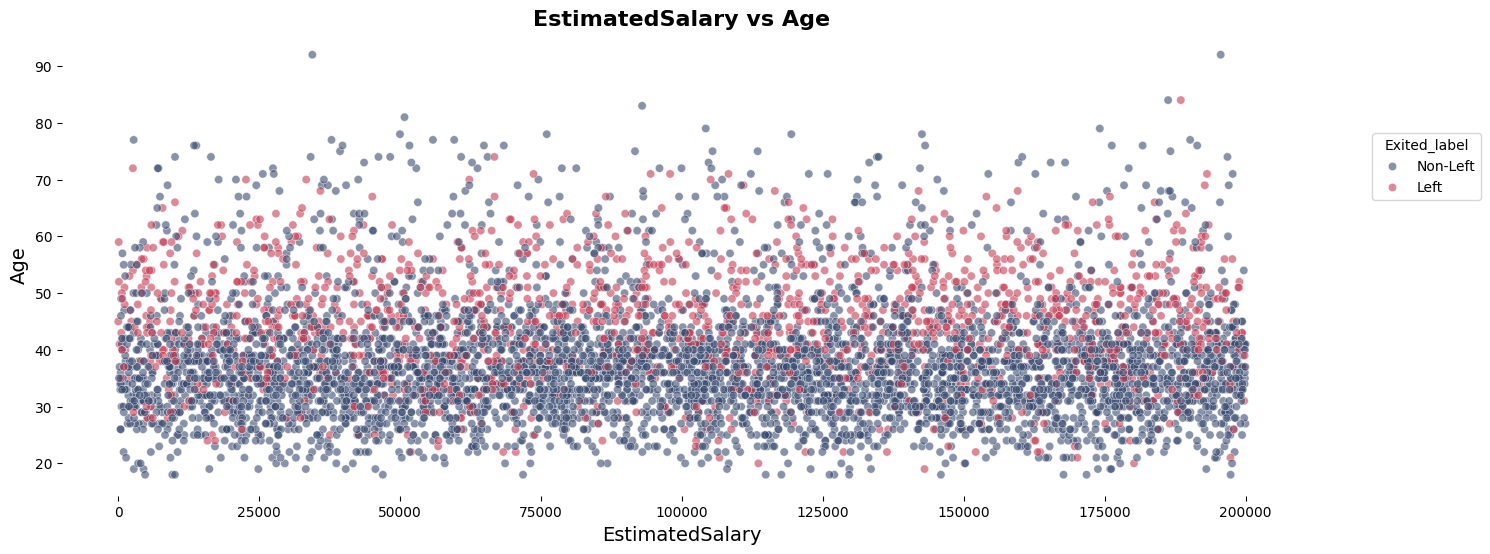

In [16]:
y = 'Age'
x = 'EstimatedSalary'
hue = 'Exited_label'

visualizer = DataVisualizer(df_filtered)
visualizer.plot_custom_scatterplot(x=x, y=y, hue=hue, custom_palette=custom_palette)

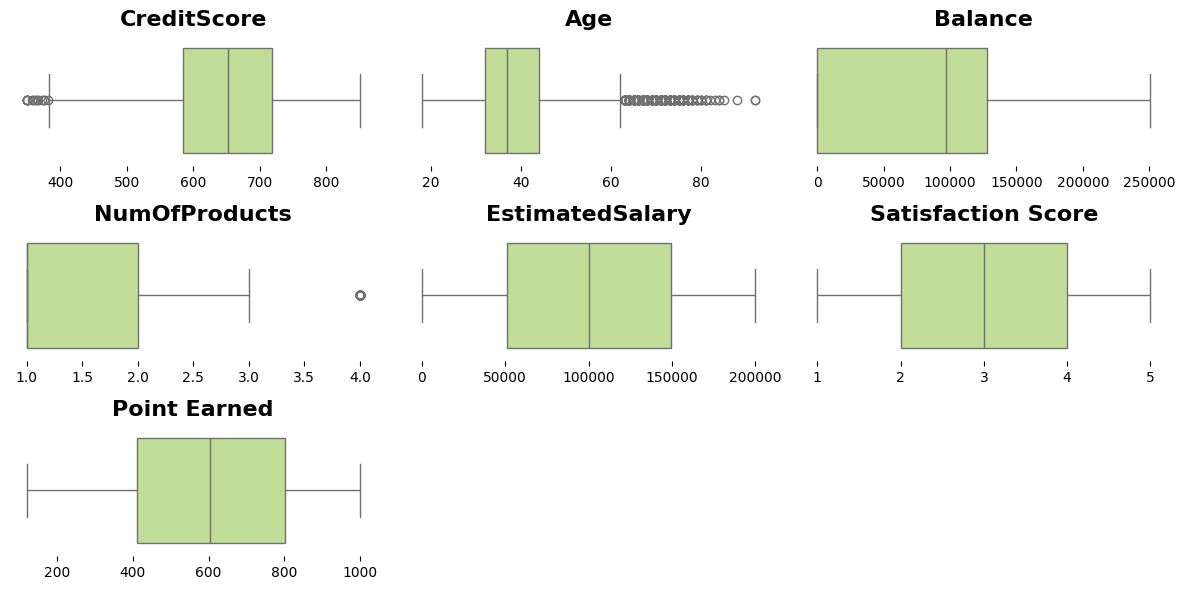

In [17]:
boxplot_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# data_visualizations(df, boxplot_features, boxplot=True, figsize=(12, 6))

visualizer = DataVisualizer(df, figsize=(12, 6))
visualizer.plot_boxplot(features=boxplot_features)

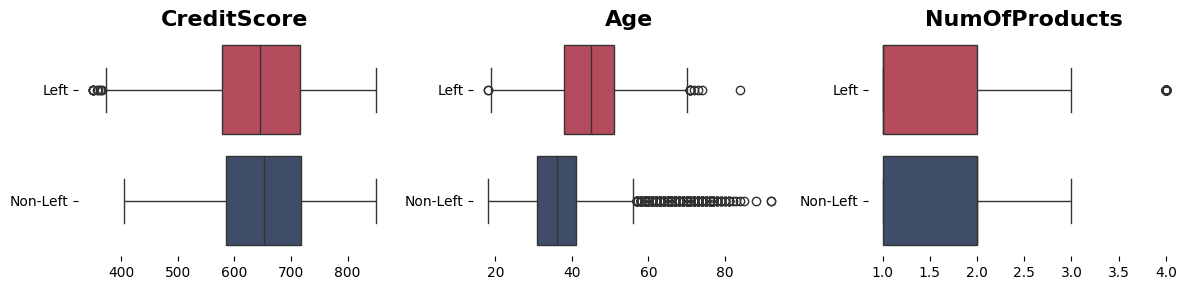

In [18]:
boxplot_features = ['CreditScore', 'Age', 'NumOfProducts']
hue = 'Exited_label'

visualizer = DataVisualizer(df, figsize=(12, 3))
visualizer.plot_boxplot(features=boxplot_features, hue=hue, custom_palette=custom_palette)

---

# Insights

In [19]:
churn_rate_gender = df.groupby('Gender')['Exited'].mean()
churn_rate_gender * 100

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64

In [20]:
churn_rate_geography = df.groupby('Geography')['Exited'].mean()
churn_rate_geography * 100

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

In [21]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['0-24', '25-34', '35-44', '45-54', '55-64', '65+'])
df['AgeGroup'].unique()
churn_rate_age = df.groupby('AgeGroup', observed=False)['Exited'].mean()
churn_rate_age

AgeGroup
0-24     0.075286
25-34    0.084980
35-44    0.196467
45-54    0.505721
55-64    0.483209
65+      0.132576
Name: Exited, dtype: float64

---

# Features Engineer

In [22]:
df_feature = pd.DataFrame()

In [23]:
df_feature['AgeGroup'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['0-24', '25-34', '35-44', '45-54', '55-64', '65+'])
df_feature['AgeGroup'].unique()

['35-44', '45-54', '25-34', '0-24', '55-64', '65+']
Categories (6, object): ['0-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

In [24]:
df_feature['BalanceCategory'] = pd.cut(df['Balance'], bins=[-float('inf'), 0, 10000, 20000, float('inf')], labels=['Negative', 'Low', 'Medium', 'High'])
df_feature['BalanceCategory'].unique()

['Negative', 'High', 'Medium', 'Low']
Categories (4, object): ['Negative' < 'Low' < 'Medium' < 'High']

In [25]:
# df_feature['Log_Balance'] = np.log(df['Balance'] + 1)  
# df_feature['Log_EstimatedSalary'] = np.log(df['EstimatedSalary'] + 1)
# df_feature['Log_BalanceSalaryRatio'] = np.log((df['Balance']/df['EstimatedSalary'] + 1).clip(lower=0.0001))

In [26]:
# df_feature['Avg_Balance_Per_Geo'] = df.groupby('Geography')['Balance'].transform('mean')

In [27]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['Age', 'Balance']])
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Age', 'Balance']))
# df_feature = pd.concat([df_feature, df_poly.drop(['Age', 'Balance'], axis=1)], axis=1)
df_feature = pd.concat([df_feature, df_poly], axis=1)
df_poly

,Age,Balance,Age^2,Age Balance,Balance^2
0,42.0,0.00,1764.0,0.00,0.000000e+00
1,41.0,83807.86,1681.0,3436122.26,7.023757e+09
2,42.0,159660.80,1764.0,6705753.60,2.549157e+10
3,39.0,0.00,1521.0,0.00,0.000000e+00
4,43.0,125510.82,1849.0,5396965.26,1.575297e+10
...,...,...,...,...,...
9995,39.0,0.00,1521.0,0.00,0.000000e+00
9996,35.0,57369.61,1225.0,2007936.35,3.291272e+09
9997,36.0,0.00,1296.0,0.00,0.000000e+00
9998,42.0,75075.31,1764.0,3153163.02,5.636302e+09


---

# Encoder

## StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
# feature_standard = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']
feature_standard = ['CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']

In [30]:
df_feature[feature_standard] = scaler.fit_transform(df[feature_standard])

---

## LabelEncoder

In [31]:
label_encoder = LabelEncoder()

In [32]:
df_feature['Geography_LabelEncoder'] = label_encoder.fit_transform(df['Geography'])
df_feature['Gender_LabelEncoder'] = label_encoder.fit_transform(df['Gender'])
df_feature['Card_Type_label_LabelEncoder'] = label_encoder.fit_transform(df['Card Type'])

---

## OrdinalEncoder

In [33]:
ordinal_encoder = OrdinalEncoder(categories=[['DIAMOND', 'PLATINUM', 'GOLD', 'SILVER']])
df_feature['Card_Type_OrdinalEncoder'] = ordinal_encoder.fit_transform(df[['Card Type']])

In [34]:
ordinal_encoder = OrdinalEncoder(categories=[['High', 'Medium', 'Low', 'Negative']])
df_feature['BalanceCategory_Encoded'] = ordinal_encoder.fit_transform(df_feature[['BalanceCategory']])

In [35]:
ordinal_encoder = OrdinalEncoder(categories=[['65+', '55-64', '45-54', '35-44', '25-34', '0-24']])
df_feature['AgeGroup_Encoded'] = ordinal_encoder.fit_transform(df_feature[['AgeGroup']])

---

## OneHotEncoder

In [36]:
onehotenconder = OneHotEncoder(drop='first', sparse_output=False)

In [37]:
features_OneHotEncoder = ['Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Satisfaction Score']
# features_OneHotEncoder = ['Geography', 'Card Type']

In [38]:
# one_hot_encoded = onehotenconder.fit_transform(df[features_OneHotEncoder])
ohe_transformed = pd.DataFrame(onehotenconder.fit_transform(df[features_OneHotEncoder]), 
                               columns=onehotenconder.get_feature_names_out(features_OneHotEncoder))
df_feature = pd.concat([df_feature, ohe_transformed], axis=1)

---

In [39]:
# features_drop = ['Exited', 'Exited_label', 'Geography', 'Gender', 'Card Type', 'CreditScore', 'Complain']
features_drop = ['AgeGroup', 'BalanceCategory']

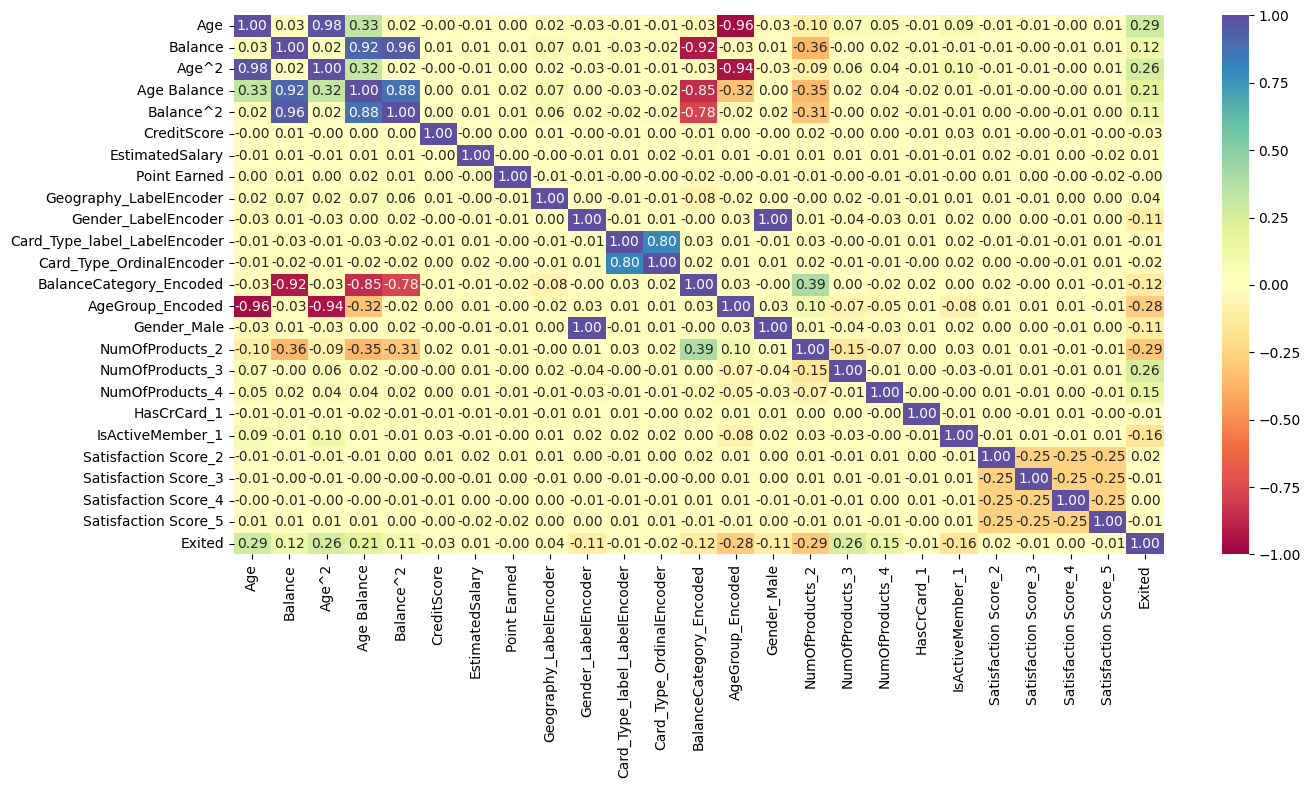

In [40]:
df_corr = df_feature.drop(features_drop, axis=1)
df_corr = pd.concat([df_corr, df['Exited']], axis=1)

plt.figure(figsize=(15, 7))
sns.heatmap(df_corr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [41]:
# X = df.drop(features_drop, axis=1).values
X = df_feature.drop(features_drop, axis=1).values
y = df['Exited'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [43]:
# tuner = ClassificationHyperTuner(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_trials=100, model_name="catboost")
# best_params, best_auc = tuner.run_optimization()

In [44]:
# tuner = ClassificationHyperTuner(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_trials=100, model_name="lightgbm")
# best_params, best_auc = tuner.run_optimization()

In [45]:
# tuner = test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_trials=100, model_name="xgboost")
# best_params, best_auc = tuner.TEST()

# print(f"Best Hyperparameters: {best_params}")
# print(f"Best AUC: {best_auc}")

In [46]:
# tuner = ClassificationHyperTuner(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_trials=100, model_name="xgboost")
# best_params, best_auc = tuner.run_optimization()

In [47]:
# best_params_CatBoostClassifier = {'iterations': 1382, 
#                                   'learning_rate': 0.005130725756449256, 
#                                   'depth': 5, 
#                                   'subsample': 0.760898152308542, 
#                                   'colsample_bylevel': 0.9511108990634419, 
#                                   'min_data_in_leaf': 137, 
#                                   'l2_leaf_reg': 0.8626534841326979, 
#                                   'grow_policy': 'SymmetricTree', 
#                                   'border_count': 188, 
#                                   'od_type': 'IncToDec',
#                                   'verbose': False}
# model_cb = cb.CatBoostClassifier(**best_params_CatBoostClassifier)

In [48]:
model_cb = cb.CatBoostClassifier(verbose=False)
train_cb = TrainingValidation(model=model_cb, rouc_curve=True, confusion_matrix=True)

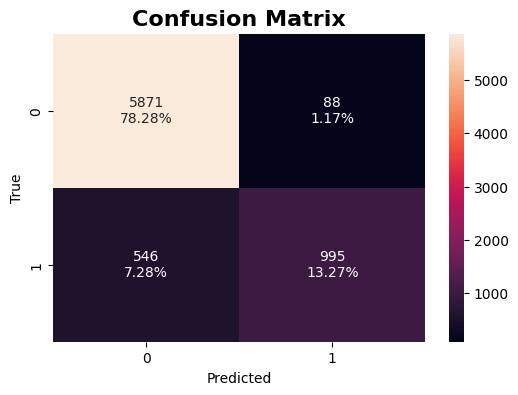

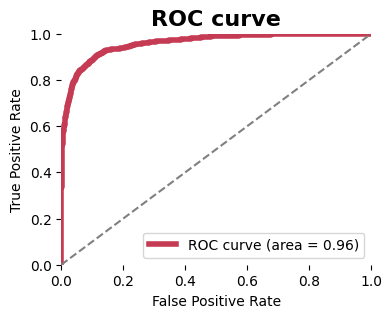

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Matthews Corrcoef,Cohen Kappa,Log Loss
0,91.55,91.57,91.55,90.97,95.88,0.73,0.71,22.22


In [49]:
normal_scores_cb = train_cb.normal(X=X_train, y=y_train)
normal_scores_cb

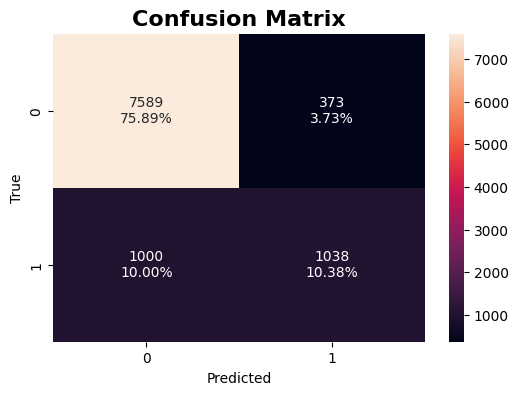

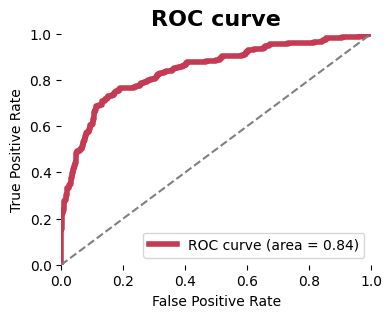

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Matthews Corrcoef,Cohen Kappa,Log Loss
0,86.27,85.36,86.27,85.27,86.1,0.53,0.52,33.99


In [50]:
cross_validation_scores_cb = train_cb.cross(X=X, y=y, n_splits = 10, oversampling=True)
cross_validation_scores_cb

In [51]:
# best_params_LGBMClassifier = {'learning_rate': 0.003172653339091766, 
#                               'num_leaves': 806, 
#                               'subsample': 0.30391187597410957, 
#                               'colsample_bytree': 0.6546779460623652, 
#                               'min_data_in_leaf': 43}
# model_lgb = lgb.LGBMClassifier(**best_params_LGBMClassifier)

In [52]:
model_lgb = lgb.LGBMClassifier(verbose=0)
train_lgb = TrainingValidation(model=model_lgb, rouc_curve=True, confusion_matrix=True)

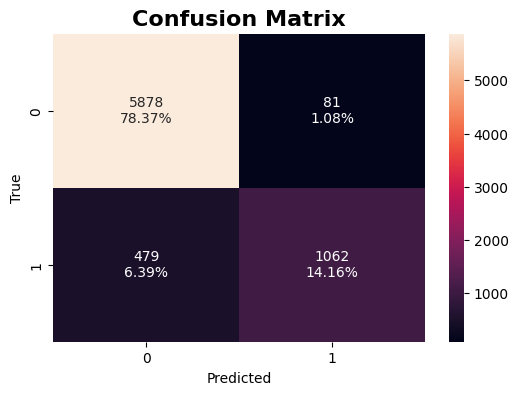

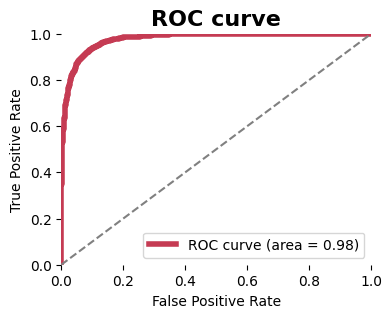

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Matthews Corrcoef,Cohen Kappa,Log Loss
0,92.53,92.56,92.53,92.1,97.67,0.76,0.75,20.03


In [53]:
normal_score_lgb = train_lgb.normal(X=X_train, y=y_train)
normal_score_lgb

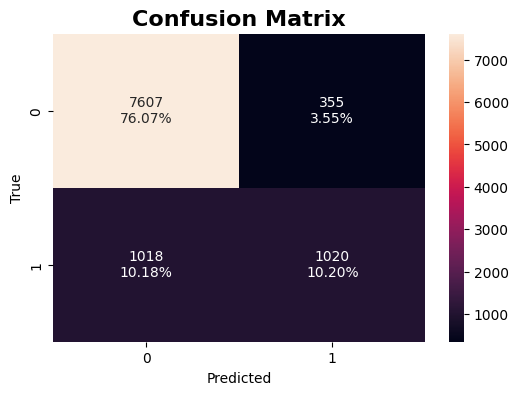

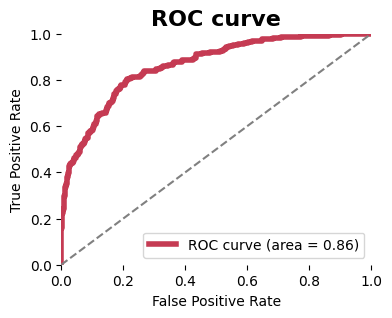

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Matthews Corrcoef,Cohen Kappa,Log Loss
0,86.27,85.36,86.27,85.21,86.08,0.53,0.52,33.75


In [54]:
cross_validation_scores_lgb= train_lgb.cross(X=X, y=y, n_splits = 10, oversampling=True)
cross_validation_scores_lgb 

In [55]:
# best_params_XGBClassifier = {'n_estimators': 452, 
#                              'learning_rate': 0.019841659544487363, 
#                              'max_depth': 6, 
#                              'subsample': 0.8978210691791821, 
#                              'colsample_bytree': 0.5335986671903277, 
#                              'min_child_weight': 10}

# best_params_XGBClassifier = {'learning_rate': 0.00172505574930131, 
#                              'max_depth': 4, 
#                              'subsample': 0.9942442662580722, 
#                              'colsample_bytree': 0.28675705086269504, 
#                              'min_child_weight': 2}
# model_xgb = xgb.XGBClassifier(**best_params_XGBClassifier)
model_xgb = xgb.XGBClassifier()

In [56]:
train_xgb = TrainingValidation(model=model_xgb, rouc_curve=True, confusion_matrix=True)

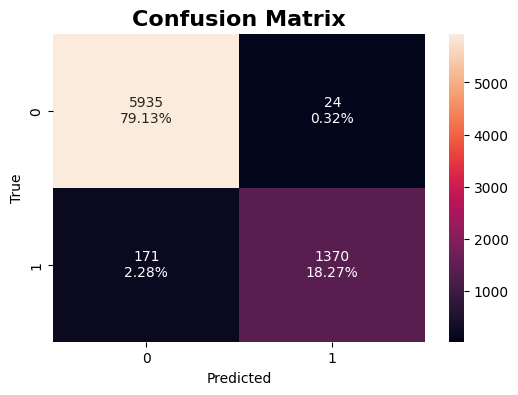

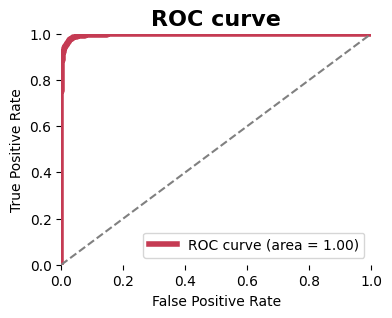

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Matthews Corrcoef,Cohen Kappa,Log Loss
0,97.4,97.42,97.4,97.35,99.64,0.92,0.92,11.91


In [57]:
normal_score_xgb = train_xgb.normal(X=X_train, y=y_train)
normal_score_xgb

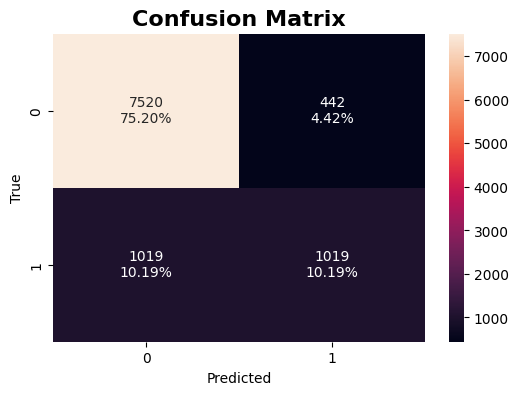

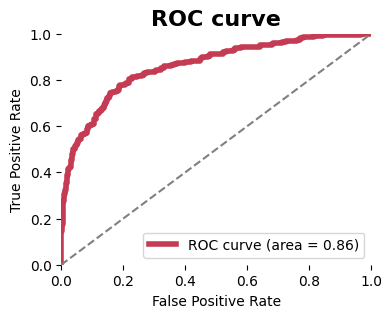

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Matthews Corrcoef,Cohen Kappa,Log Loss
0,85.39,84.32,85.39,84.43,84.51,0.51,0.5,36.88


In [58]:
cross_validation_scores_xgb = train_xgb.cross(X=X, y=y, n_splits = 10, oversampling=True)
cross_validation_scores_xgb

In [59]:
combined_df = pd.concat([normal_score_xgb,
                         cross_validation_scores_xgb, 
                         normal_scores_cb,
                         cross_validation_scores_cb,
                         normal_score_lgb,
                         cross_validation_scores_lgb,
                         ], ignore_index=True)
index_names = ['normal_xgb', 
               'cross_xgb',
               'normal_cb', 
               'cross_cb', 
               'normal_lgb', 
               'cross_lgb', 
]


combined_df['scores'] = index_names
combined_df = combined_df.set_index('scores')

combined_df.sort_values(by='Log Loss')

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Matthews Corrcoef,Cohen Kappa,Log Loss
scores,,,,,,,,
normal_xgb,97.40,97.42,97.40,97.35,99.64,0.92,0.92,11.91
normal_lgb,92.53,92.56,92.53,92.10,97.67,0.76,0.75,20.03
normal_cb,91.55,91.57,91.55,90.97,95.88,0.73,0.71,22.22
cross_lgb,86.27,85.36,86.27,85.21,86.08,0.53,0.52,33.75
cross_cb,86.27,85.36,86.27,85.27,86.10,0.53,0.52,33.99
cross_xgb,85.39,84.32,85.39,84.43,84.51,0.51,0.50,36.88


In [60]:
train_xgb = TrainingValidation(model=model_xgb, rouc_curve=False, confusion_matrix=False)
normal_score_xgb = train_xgb.normal(X=X_train, y=y_train)

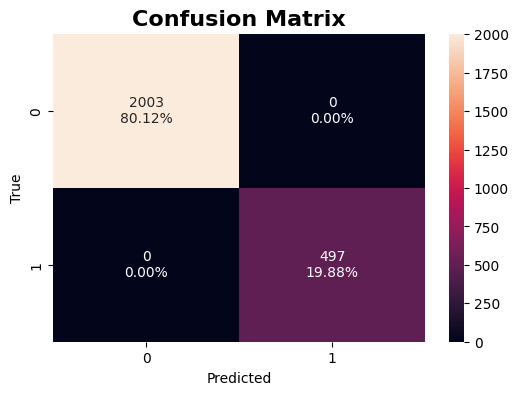

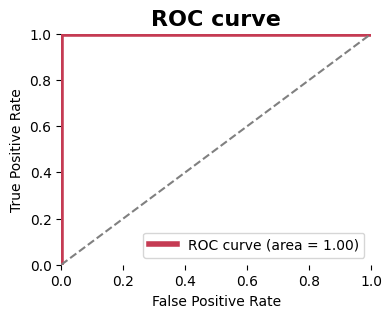

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Matthews Corrcoef,Cohen Kappa,Log Loss
0,100.0,100.0,100.0,100.0,100.0,1.0,1.0,4.05


In [61]:
train_xgb = TrainingValidation(model=model_xgb, rouc_curve=True, confusion_matrix=True)
normal_score_xgb = train_xgb.normal(X=X_test, y=y_test)
normal_score_xgb

In [62]:
shap_plot = ShapPlot(model=model_xgb, X_test=X_test, df_feature=df_feature, features_drop=features_drop)

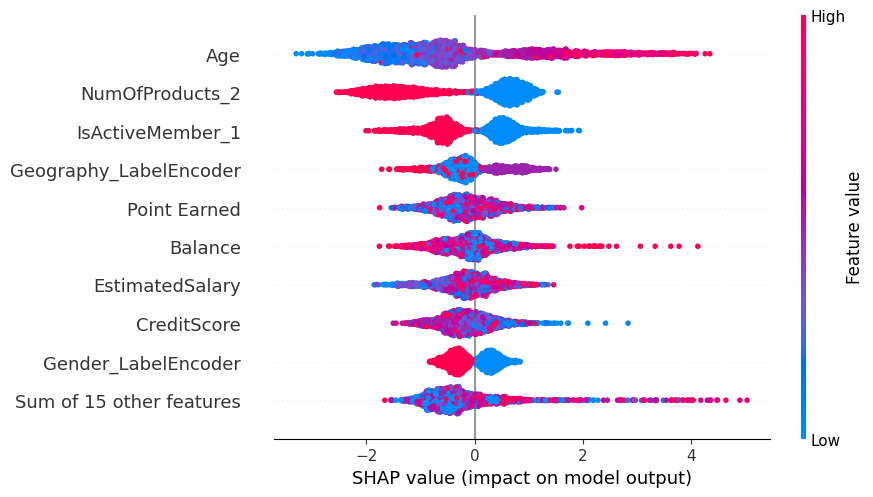

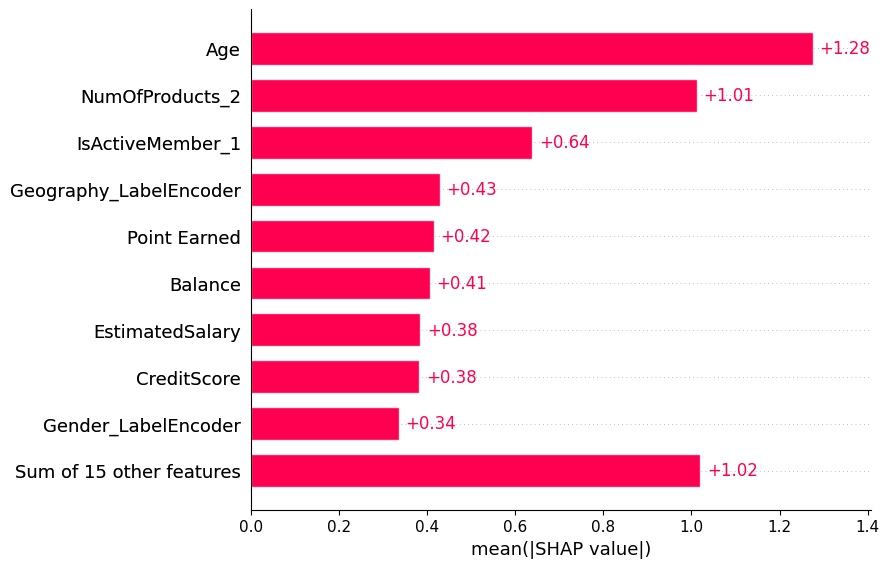

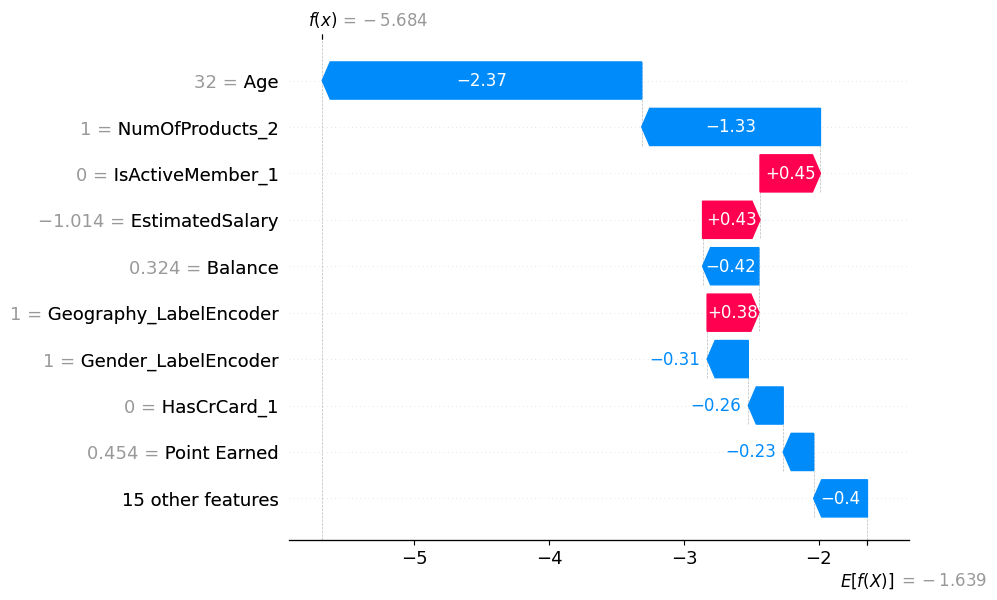

In [63]:
shap_plot.first_analysis()

In [64]:
# shap_plot.complete(show_interactions=True)